In [1]:
# Cargamos paqueterías para regresión no lineal y ploteo
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generamos datos sintéticos
np.random.seed(0)
x_data = np.linspace(0, 4, 50)
true_params = [2.5, -1.3, 0.5]
y_data = true_params[0] * np.exp(true_params[1] * x_data) + true_params[2] + 0.2 * np.random.normal(size=x_data.size)
# Definimos función no lineal paramétrica
def model(x, a, b, c):
    return a * np.exp(b * x) + c
# Ajustamos el modelo con scipy.optimize.curve_fit
popt, pcov = curve_fit(model, x_data, y_data, p0=(1, -1, 0))
# Imprimimos parámetros ajustados
print("Parámetros ajustados:", popt)

Parámetros ajustados: [ 2.80720814 -1.24568448  0.44517316]


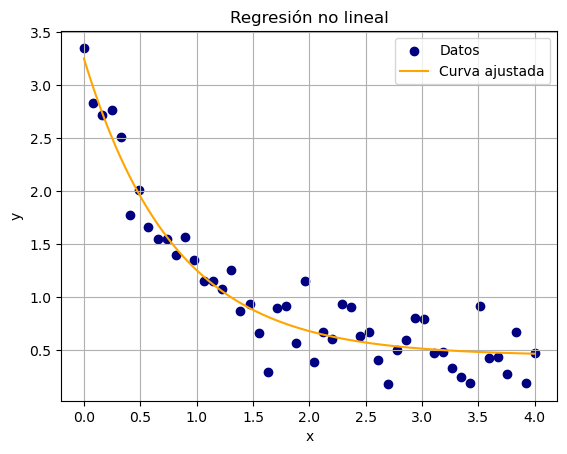

In [3]:
# Ploteamos el ajuste
x_fit = np.linspace(0, 4, 200)
y_fit = model(x_fit, *popt)
plt.scatter(x_data, y_data, label="Datos", color="navy")
plt.plot(x_fit, y_fit, label="Curva ajustada", color="orange")
plt.title("Regresión no lineal")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Cargamos datos reales de bacterias paramecium
import pandas as pd
df = pd.read_csv('paramecium.csv')

In [ ]:
display(df.head())

,Species,Day,Nt,Nt1,dN,r
0,Paramecium caudatum,2,5.849284,NaN,NaN,NaN
1,Paramecium caudatum,3,13.672890,5.849284,7.823607,1.337532
2,Paramecium caudatum,4,NaN,13.672890,NaN,NaN
3,Paramecium caudatum,5,35.697880,NaN,NaN,NaN
4,Paramecium caudatum,6,73.947840,35.697880,38.249959,1.071491


In [ ]:
# Nos deshacemos de los valores flatantes en Nt
na_ind = -df["Nt"].isna()
t = df["Day"][na_ind].values
N = df["Nt"][na_ind].values

In [ ]:
# Definimos función de crecimiento logístico
def model(x,a,b,c):
    return c / (1.0 + np.exp(-a - b * x))

In [ ]:
# Ajustamos el modelo con scipy.optimize.curve_fit
popt, pcov = curve_fit(model, t, N, p0=(1, -1, 0))

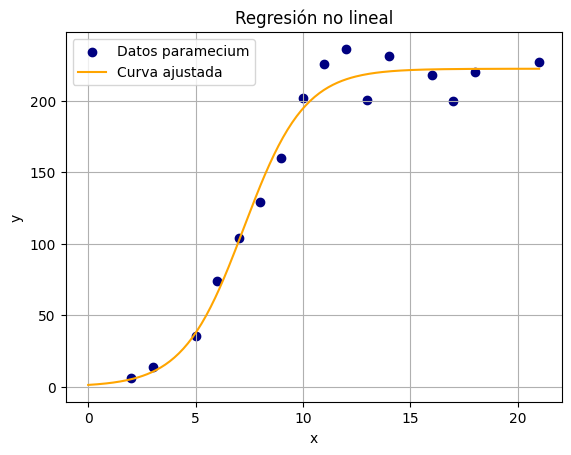

In [ ]:
# Ploteamos el ajuste
x_fit = np.linspace(0, 21, 200)
y_fit = model(x_fit, *popt)
plt.scatter(t, N, label="Datos paramecium", color="navy")
plt.plot(x_fit, y_fit, label="Curva ajustada", color="orange")
plt.title("Regresión curva logística")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()